<a href="https://colab.research.google.com/github/Danazzz/dataset-beras-scm/blob/main/SCM_Beras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Import libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.figsize'] = 15, 6            #agar semua plot ukurannya sama
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
!wget https://raw.githubusercontent.com/Danazzz/dataset-beras-scm/master/Tabel%20Harga%20Berdasarkan%20Daerah%20Jabar.csv

--2024-03-19 15:32:17--  https://raw.githubusercontent.com/Danazzz/dataset-beras-scm/master/Tabel%20Harga%20Berdasarkan%20Daerah%20Jabar.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.


HTTP request sent, awaiting response... 200 OK
Length: 80537 (79K) [text/plain]
Saving to: ‘Tabel Harga Berdasarkan Daerah Jabar.csv.3’

Tabel Harga Berdasa 100%[===================>]  78.65K  --.-KB/s    in 0.04s   

2024-03-19 15:32:17 (1.86 MB/s) - ‘Tabel Harga Berdasarkan Daerah Jabar.csv.3’ saved [80537/80537]



In [46]:
!wget https://raw.githubusercontent.com/Danazzz/dataset-beras-scm/master/export-produsen-2-2.csv

--2024-03-19 15:32:17--  https://raw.githubusercontent.com/Danazzz/dataset-beras-scm/master/export-produsen-2-2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135428 (132K) [text/plain]
Saving to: ‘export-produsen-2-2.csv.3’

export-produsen-2-2 100%[===================>] 132.25K  --.-KB/s    in 0.1s    

2024-03-19 15:32:18 (1.29 MB/s) - ‘export-produsen-2-2.csv.3’ saved [135428/135428]



In [47]:
#Load data BI
df1 = pd.read_csv('Tabel Harga Berdasarkan Daerah Jabar.csv', thousands=",", quotechar = '\"', quoting = csv.QUOTE_ALL, encoding = 'ISO-8859-1')
# print(df1.head())
df1

,Komoditas,Beras,Beras Kualitas Bawah I,Beras Kualitas Bawah II,Beras Kualitas Medium I,Beras Kualitas Medium II,Beras Kualitas Super I,Beras Kualitas Super II
0,01/ 01/ 2020,-,-,-,-,-,-,-
1,02/ 01/ 2020,"11,150","10,100","9,500","11,350","10,850","12,900","12,100"
2,03/ 01/ 2020,"11,150","10,100","9,500","11,350","10,850","12,900","12,100"
3,06/ 01/ 2020,"11,150","10,150","9,550","11,350","10,850","12,900","12,100"
4,07/ 01/ 2020,"11,200","10,200","9,650","11,400","10,900","12,950","12,150"
...,...,...,...,...,...,...,...,...
1093,11/ 03/ 2024,"15,800","14,950","14,500","16,050","15,550","17,250","16,550"
1094,12/ 03/ 2024,"15,800","14,950","14,500","16,050","15,550","17,250","16,550"
1095,13/ 03/ 2024,"15,750","14,900","14,400","16,000","15,450","17,200","16,550"
1096,14/ 03/ 2024,"15,750","14,900","14,400","16,000","15,450","17,200","16,550"


In [48]:
print('Data Types:')
print(df1.dtypes)

Data Types:
Komoditas                   object
Beras                       object
Beras Kualitas Bawah I      object
Beras Kualitas Bawah II     object
Beras Kualitas Medium I     object
Beras Kualitas Medium II    object
Beras Kualitas Super I      object
Beras Kualitas Super II     object
dtype: object


In [49]:
#Mengubah tanggal menjadi index
con=df1['Komoditas']
df1['Komoditas'] = pd.to_datetime(df1['Komoditas'], format='%d/ %m/ %Y')
df1.set_index('Komoditas', inplace=True)
#check datatype of index
df1.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07',
               '2024-03-08', '2024-03-11', '2024-03-12', '2024-03-13',
               '2024-03-14', '2024-03-15'],
              dtype='datetime64[ns]', name='Komoditas', length=1098, freq=None)

In [50]:
df1 = df1.iloc[:, [0, 1, 3, 5]]
df1

,Beras,Beras Kualitas Bawah I,Beras Kualitas Medium I,Beras Kualitas Super I
Komoditas,,,,
2020-01-01,-,-,-,-
2020-01-02,"11,150","10,100","11,350","12,900"
2020-01-03,"11,150","10,100","11,350","12,900"
2020-01-06,"11,150","10,150","11,350","12,900"
2020-01-07,"11,200","10,200","11,400","12,950"
...,...,...,...,...
2024-03-11,"15,800","14,950","16,050","17,250"
2024-03-12,"15,800","14,950","16,050","17,250"
2024-03-13,"15,750","14,900","16,000","17,200"


In [51]:
# Mengubah - menjadi 0
df1.replace('-', 0, inplace=True)
df1

/var/folders/3s/37cdhq1x7fdcds5p4y_vnbp00000gn/T/ipykernel_39195/982967455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('-', 0, inplace=True)


,Beras,Beras Kualitas Bawah I,Beras Kualitas Medium I,Beras Kualitas Super I
Komoditas,,,,
2020-01-01,0,0,0,0
2020-01-02,"11,150","10,100","11,350","12,900"
2020-01-03,"11,150","10,100","11,350","12,900"
2020-01-06,"11,150","10,150","11,350","12,900"
2020-01-07,"11,200","10,200","11,400","12,950"
...,...,...,...,...
2024-03-11,"15,800","14,950","16,050","17,250"
2024-03-12,"15,800","14,950","16,050","17,250"
2024-03-13,"15,750","14,900","16,000","17,200"


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1098 entries, 2020-01-01 to 2024-03-15
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Beras                    1098 non-null   object
 1   Beras Kualitas Bawah I   1098 non-null   object
 2   Beras Kualitas Medium I  1098 non-null   object
 3   Beras Kualitas Super I   1098 non-null   object
dtypes: object(4)
memory usage: 42.9+ KB


In [53]:
#Load data
df2 = pd.read_csv('export-produsen-2-2.csv', thousands='.', sep=',')
# print(df2.head())
df2

,Komoditas,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Jagung Pipilan Kering,Kedelai Biji Kering (Lokal),Bawang Merah,Cabai Merah Keriting,Cabai Rawit Merah,Sapi (Hidup),Ayam Ras Pedaging (Hidup),Telur Ayam Ras,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan
0,01/01/2020,20,3.700,4.000,4.500,8.200,9.200,-,-,-,-,-,-,-,-,600,150
1,02/01/2020,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,03/01/2020,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,04/01/2020,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,05/01/2020,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,11/03/2024,10,6.760,7.140,8.330,14.180,15.640,5.540,10.610,15.990,41.880,45.050,54.440,24.480,27.540,120,80
1532,12/03/2024,10,6.530,6.930,8.260,14.140,15.480,5.250,10.610,16.330,42.830,43.390,54.470,24.480,28.260,120,80
1533,13/03/2024,10,6.480,6.920,8.240,14.040,15.460,5.280,10.310,15.990,43.770,42.270,54.560,24.000,28.200,100,60
1534,14/03/2024,10,6.510,7.060,8.240,14.050,15.510,5.280,10.310,15.840,45.070,41.840,54.550,24.010,28.130,150,70


PRODUSEN
Panel Harga Pangan pada tingkat produsen yang diamati meliputi:
- Luas Lahan/Sawah Padi, persentase (%) luas panen Padi di kecamatan sentra produksi.
- GKP Tingkat Petani, harga di Petani (Rp/Kg)
- GKP Tingkat Penggilingan, harga di Penggilingan (Rp/Kg)
- GKG Tingkat Penggilingan, harga di Penggilingan (Rp/Kg)
- Beras Medium Tingkat Penggilingan, harga di Penggilingan (Rp/Kg)
- Beras Premium Tingkat Penggilingan, harga di Penggilingan (Rp/Kg)
- Stok GKG Tingkat Penggilingan, stok dalam satuan Kwintal
- Stok Beras Tingkat Penggilingan, stok dalam satuan Kwintal

In [54]:
print('Data Types:')
print(df2.dtypes)

Data Types:
Komoditas                          object
Luas Panen Padi                    object
GKP Tingkat Petani                 object
GKP Tingkat Penggilingan           object
GKG Tingkat Penggilingan           object
Beras Medium Penggilingan          object
Beras Premium Penggilingan         object
Jagung Pipilan Kering              object
Kedelai Biji Kering (Lokal)        object
Bawang Merah                       object
Cabai Merah Keriting               object
Cabai Rawit Merah                  object
Sapi (Hidup)                       object
Ayam Ras Pedaging (Hidup)          object
Telur Ayam Ras                     object
Stok GKG Tingkat Penggilingan      object
Stok Beras Tingkat Penggilingan    object
dtype: object


In [55]:
#Mengubah tanggal menjadi index
con=df2['Komoditas']
df2['Komoditas'] = pd.to_datetime(df2['Komoditas'], format='%d/%m/%Y')
df2.set_index('Komoditas', inplace=True)
#check datatype of index
df2.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2024-03-06', '2024-03-07', '2024-03-08', '2024-03-09',
               '2024-03-10', '2024-03-11', '2024-03-12', '2024-03-13',
               '2024-03-14', '2024-03-15'],
              dtype='datetime64[ns]', name='Komoditas', length=1536, freq=None)

In [56]:
df2 = df2.iloc[:, [0, 1, 2, 3, 4, 5, 14, 15]]
df2

,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan
Komoditas,,,,,,,,
2020-01-01,20,3.700,4.000,4.500,8.200,9.200,600,150
2020-01-02,-,-,-,-,-,-,-,-
2020-01-03,-,-,-,-,-,-,-,-
2020-01-04,-,-,-,-,-,-,-,-
2020-01-05,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...
2024-03-11,10,6.760,7.140,8.330,14.180,15.640,120,80
2024-03-12,10,6.530,6.930,8.260,14.140,15.480,120,80
2024-03-13,10,6.480,6.920,8.240,14.040,15.460,100,60


In [57]:
# Mengubah - menjadi 0
df2.replace('-', 0, inplace=True)
df2

/var/folders/3s/37cdhq1x7fdcds5p4y_vnbp00000gn/T/ipykernel_39195/2869864619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace('-', 0, inplace=True)


,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan
Komoditas,,,,,,,,
2020-01-01,20,3.700,4.000,4.500,8.200,9.200,600,150
2020-01-02,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2024-03-11,10,6.760,7.140,8.330,14.180,15.640,120,80
2024-03-12,10,6.530,6.930,8.260,14.140,15.480,120,80
2024-03-13,10,6.480,6.920,8.240,14.040,15.460,100,60


In [58]:
df3 = pd.merge(df1, df2, on='Komoditas')
df3

,Beras,Beras Kualitas Bawah I,Beras Kualitas Medium I,Beras Kualitas Super I,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan
Komoditas,,,,,,,,,,,,
2020-01-01,0,0,0,0,20,3.700,4.000,4.500,8.200,9.200,600,150
2020-01-02,"11,150","10,100","11,350","12,900",0,0,0,0,0,0,0,0
2020-01-03,"11,150","10,100","11,350","12,900",0,0,0,0,0,0,0,0
2020-01-06,"11,150","10,150","11,350","12,900",0,0,0,0,0,0,0,0
2020-01-07,"11,200","10,200","11,400","12,950",0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,"15,800","14,950","16,050","17,250",10,6.760,7.140,8.330,14.180,15.640,120,80
2024-03-12,"15,800","14,950","16,050","17,250",10,6.530,6.930,8.260,14.140,15.480,120,80
2024-03-13,"15,750","14,900","16,000","17,200",10,6.480,6.920,8.240,14.040,15.460,100,60


In [59]:
df3.info()
df3.nunique()

# Menampilkan nilai unik dalam setiap kolom
for col in df3.columns:
    unique_values = df3[col].unique()
    print(f"Nilai unik dalam kolom {col}: {unique_values}")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1098 entries, 2020-01-01 to 2024-03-15
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Beras                            1098 non-null   object
 1   Beras Kualitas Bawah I           1098 non-null   object
 2   Beras Kualitas Medium I          1098 non-null   object
 3   Beras Kualitas Super I           1098 non-null   object
 4   Luas Panen Padi                  1098 non-null   object
 5   GKP Tingkat Petani               1098 non-null   object
 6   GKP Tingkat Penggilingan         1098 non-null   object
 7   GKG Tingkat Penggilingan         1098 non-null   object
 8   Beras Medium Penggilingan        1098 non-null   object
 9   Beras Premium Penggilingan       1098 non-null   object
 10  Stok GKG Tingkat Penggilingan    1098 non-null   object
 11  Stok Beras Tingkat Penggilingan  1098 non-null   object
dtypes: object(12)
me

In [60]:
df3 = df3.replace(',', '', regex=True)
df3 = df3.apply(pd.to_numeric)

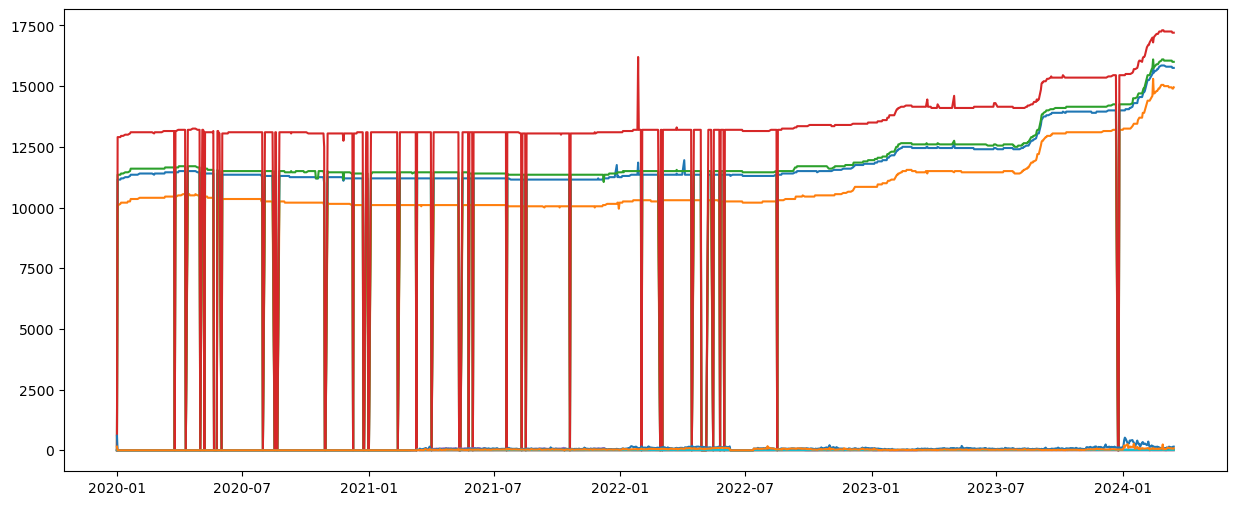

In [61]:
plt.plot(df3)

In [62]:
df3 = df3.apply(pd.to_numeric)

In [63]:
print(df3.dtypes)

Beras                                int64
Beras Kualitas Bawah I               int64
Beras Kualitas Medium I              int64
Beras Kualitas Super I               int64
Luas Panen Padi                    float64
GKP Tingkat Petani                 float64
GKP Tingkat Penggilingan           float64
GKG Tingkat Penggilingan           float64
Beras Medium Penggilingan          float64
Beras Premium Penggilingan         float64
Stok GKG Tingkat Penggilingan        int64
Stok Beras Tingkat Penggilingan      int64
dtype: object


In [64]:
print(df3.duplicated().sum())

290


In [65]:
print(df3.describe())
print(df3['Beras'].value_counts())

              Beras  Beras Kualitas Bawah I  Beras Kualitas Medium I  \
count   1098.000000             1098.000000              1098.000000   
mean   11374.180328            10404.690346             11548.770492   
std     2653.655485             2498.790655              2689.360149   
min        0.000000                0.000000                 0.000000   
25%    11200.000000            10100.000000             11450.000000   
50%    11350.000000            10300.000000             11500.000000   
75%    12400.000000            11450.000000             12550.000000   
max    15850.000000            15300.000000             16100.000000   

       Beras Kualitas Super I  Luas Panen Padi  GKP Tingkat Petani  \
count             1098.000000      1098.000000         1098.000000   
mean             13055.692168        18.297550            3.479754   
std               2943.701761        21.816299            2.454904   
min                  0.000000         0.000000            0.000000   
2

In [66]:
df3 = df3.interpolate()
df3

,Beras,Beras Kualitas Bawah I,Beras Kualitas Medium I,Beras Kualitas Super I,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan
Komoditas,,,,,,,,,,,,
2020-01-01,0,0,0,0,20.0,3.70,4.00,4.50,8.20,9.20,600,150
2020-01-02,11150,10100,11350,12900,0.0,0.00,0.00,0.00,0.00,0.00,0,0
2020-01-03,11150,10100,11350,12900,0.0,0.00,0.00,0.00,0.00,0.00,0,0
2020-01-06,11150,10150,11350,12900,0.0,0.00,0.00,0.00,0.00,0.00,0,0
2020-01-07,11200,10200,11400,12950,0.0,0.00,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,15800,14950,16050,17250,10.0,6.76,7.14,8.33,14.18,15.64,120,80
2024-03-12,15800,14950,16050,17250,10.0,6.53,6.93,8.26,14.14,15.48,120,80
2024-03-13,15750,14900,16000,17200,10.0,6.48,6.92,8.24,14.04,15.46,100,60
